In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
import numpy as np
import pandas as pd
import sqlalchemy as sa
sys.path.append(os.path.abspath(os.path.join('..','..','..')))
from pudl import pudl, mcoe, analysis, constants, settings

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
# What is this chained_assignment thing all about?
pd.options.mode.chained_assignment = None
%matplotlib inline
plt.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['figure.dpi'] = 150
pd.options.display.max_columns = 56

In [3]:
pudl_engine  = pudl.db_connect_pudl()

### Pull/Sum tables

In [4]:
g9_summed = mcoe.generation_pull_eia923(pudl_engine)
g8_es = mcoe.generators_pull_eia860(pudl_engine)
frc9_summed, frc9_summed_plant = mcoe.fuel_reciepts_costs_pull_eia923(pudl_engine)
bga8 = mcoe.boiler_generator_pull_eia860(pudl_engine)
bf9_summed, bf9_plant_summed = mcoe.boiler_fuel_pull_eia923(pudl_engine)

### Heat Rate

In [5]:
heat_rate = mcoe.heat_rate(bga8, g9_summed, bf9_summed, bf9_plant_summed, pudl_engine)

In [6]:
heat_rate.sample(10)

,complete_assn,fuel_consumed_mmbtu_per_gen,generator_id,heat_rate_mmbtu_mwh,net_generation_mwh,plant_assn,plant_id_eia,plant_id_pudl_x,plant_id_pudl_y,report_year
12726,True,3.883443e+07,2,10.187259,3812059.0,True,8066,NaN,NaN,2015
5317,True,3.385052e+06,2,12.908075,262243.0,True,1891,NaN,NaN,2010
16069,True,1.824077e+05,GEN7,56.718815,3216.0,True,50305,NaN,NaN,2012
2788,False,NaN,A02,10.969333,1074315.0,False,55220,NaN,NaN,2015
69,True,9.543167e+05,2,14.101466,67675.0,True,7,NaN,NaN,2015
2943,True,2.856643e+05,3,14.108969,20247.0,True,991,NaN,NaN,2009
11392,True,2.714612e+07,2,11.184325,2427158.0,True,6139,NaN,NaN,2014
3188,False,NaN,CTG2,12.302974,801043.0,False,55393,NaN,NaN,2016
1962,True,1.501645e+07,1,9.940403,1510648.0,True,667,NaN,NaN,2015
4284,False,NaN,GEN2,7.019794,516330.0,False,58503,NaN,NaN,2016


In [7]:
fuel_cost = mcoe.fuel_cost(g8_es, g9_summed, frc9_summed, frc9_summed_plant, heat_rate)

In [8]:
fuel_cost.sample(10)

,plant_id_eia,report_year,generator_id,net_generation_mwh,energy_source,energy_source_cons,energy_source_count,mmbtu,fuel_cost,fuel_cost_per_mmbtu_average,heat_rate_mmbtu_mwh,fuel_cost_per_mwh
789,465,2010,4,429259.00,SUB,coal,1.0,7.778939e+06,1.182064e+07,1.519569,12.523567,19.030427
363,259,2013,4,33216.00,NG,gas,1.0,NaN,NaN,NaN,10.896063,NaN
4810,10613,2011,TG10,218900.00,BLQ,biomass_solid,2.0,NaN,NaN,NaN,23.524713,NaN
4792,10612,2009,GEN1,495506.00,BLQ,biomass_solid,2.0,NaN,NaN,NaN,29.122951,NaN
13638,56078,2015,1,464510.00,NG,gas,1.0,1.226336e+07,4.224681e+07,3.444962,13.284904,45.765984
14265,58151,2015,GTG01,175072.39,NG,gas,1.0,NaN,NaN,NaN,12.663605,NaN
5745,54216,2009,GEN7,92693.00,BLQ,biomass_solid,2.0,NaN,NaN,NaN,80.267739,NaN
5986,55641,2015,CTG1,799708.00,NG,gas,2.0,1.938802e+07,6.222506e+07,3.209459,12.257508,39.339971
3768,2872,2011,2,594304.00,BIT,coal,1.0,6.253356e+07,1.529901e+08,2.446528,10.535346,25.775019
1190,1032,2015,5,74810.00,BIT,coal,2.0,NaN,NaN,NaN,16.626305,NaN


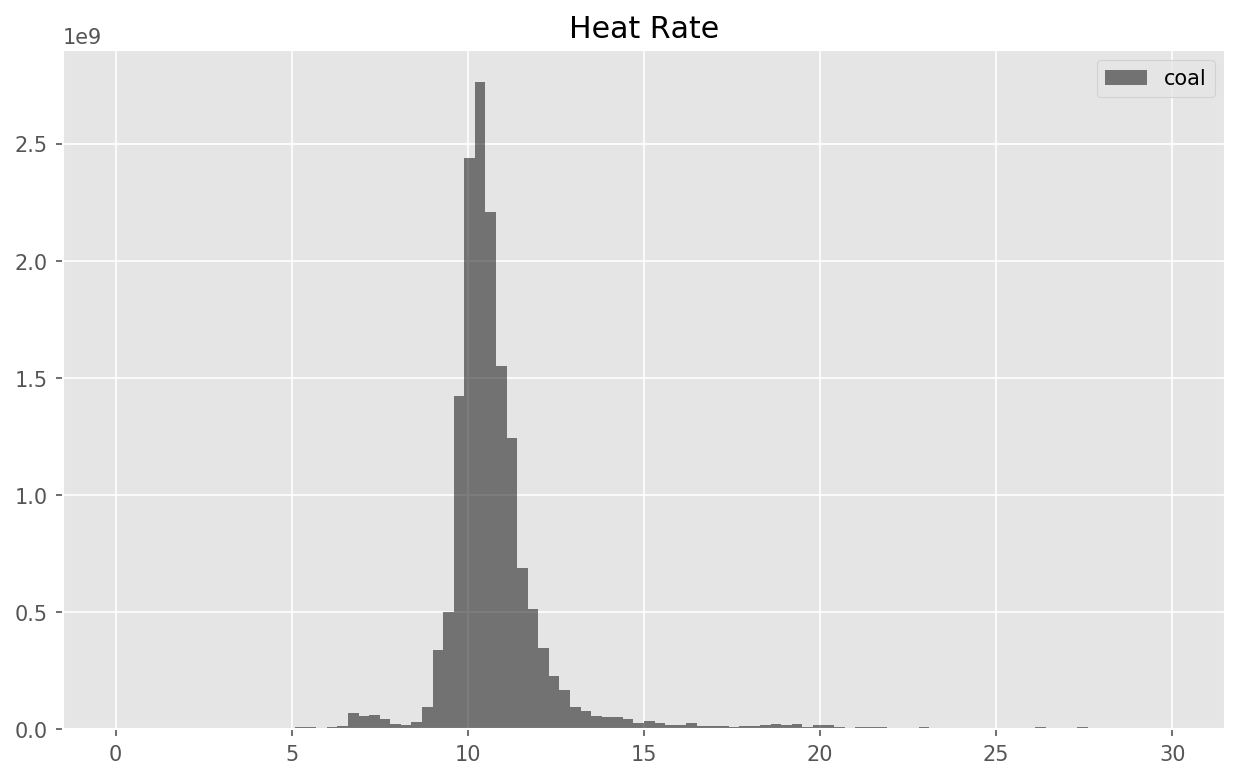

In [9]:
plt.hist(heat_rate.heat_rate_mmbtu_mwh,
         bins=100,range=(0,30),
         alpha=0.5,
         color='black',
         label="coal",
         weights=heat_rate.net_generation_mwh)
plt.title("Heat Rate")
plt.legend();

### Fuel Cost Calc

/Users/zaneselvans/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/zaneselvans/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


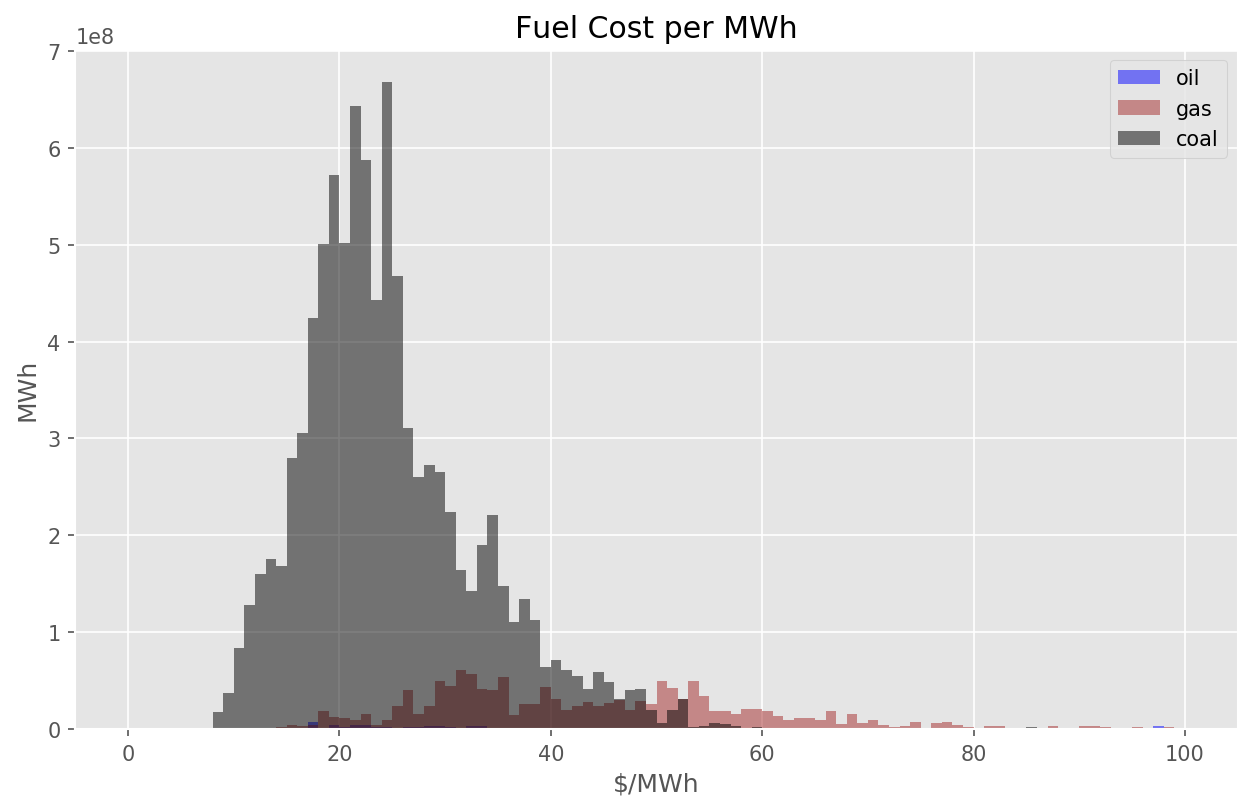

In [10]:
#plt.hist(mmbtu_one_fuel_bit.mmbtu_propotion_es, range=(.4,1), bins=100, alpha=0.5, color='green', label="BIT")
plt.hist(fuel_cost[fuel_cost['energy_source_cons'] == 'oil'].fuel_cost_per_mwh, bins=100,range=(0,100), alpha=0.5, color='blue', label="oil",weights=fuel_cost[fuel_cost['energy_source_cons'] == 'oil'].net_generation_mwh)
plt.hist(fuel_cost[fuel_cost['energy_source_cons'] == 'gas'].fuel_cost_per_mwh, bins=100,range=(0,100), alpha=0.5, color='brown', label="gas", weights=fuel_cost[fuel_cost['energy_source_cons'] == 'gas'].net_generation_mwh)
plt.hist(fuel_cost[fuel_cost['energy_source_cons'] == 'coal'].fuel_cost_per_mwh, bins=100,range=(0,100), alpha=0.5, color='black', label="coal",weights=fuel_cost[fuel_cost['energy_source_cons'] == 'coal'].net_generation_mwh)
plt.xlabel("$/MWh")
plt.ylabel("MWh")
plt.title("Fuel Cost per MWh")
plt.legend();

## Guts....

Prepping for simplifying fuel cost function

In [11]:
# for use in simplifying the fuel cost funciton
plant_types = {'one_fuel': (g8_es[g8_es['energy_source_count'] == 1], frc9_summed_plant),
               'multi_fuel': (g8_es[g8_es['energy_source_count'] > 1], frc9_summed)}

In [12]:
plant_types['multi_fuel'][1]

,plant_id_eia,report_year,energy_source_cons,mmbtu,fuel_cost,fuel_cost_per_mmbtu_average
0,3,2009,coal,8.784741e+07,3.019373e+08,3.437065
1,3,2009,gas,4.316773e+07,1.881205e+08,4.357896
2,3,2010,coal,8.315514e+07,3.124745e+08,3.757729
3,3,2010,gas,5.171804e+07,2.463235e+08,4.762817
4,3,2011,coal,4.714560e+07,2.025195e+08,4.295619
5,3,2011,gas,5.537486e+07,2.387169e+08,4.310926
6,3,2012,coal,6.009745e+07,2.822035e+08,4.695764
7,3,2012,gas,5.746339e+07,1.782302e+08,3.101630
8,3,2013,coal,4.762586e+07,2.217092e+08,4.655227
9,3,2013,gas,5.615702e+07,2.254626e+08,4.014862


In [13]:
for plants in plant_types:
    print(plants)

one_fuel
multi_fuel


### Creation of the fuel cost calc

In [14]:
one_fuel_plants = g8_es[g8_es['energy_source_count'] == 1]

In [15]:
multi_fuel_plants = g8_es[g8_es['energy_source_count'] > 1]

OhMiGosh Actually calculating Fuel Cost

In [16]:
# Multi Fuel Method

In [17]:
net_gen_multi_fuel = g9_summed.merge(multi_fuel_plants, how='left', on=[
                          'plant_id_eia', 'generator_id','report_year'])
net_gen_multi_fuel.dropna(inplace=True)

# Merge this net_gen table with frc9_summed to have
# fuel_cost_per_mmbtu_total associated with generators
fuel_cost_per_mmbtu_multi_fuel = net_gen_multi_fuel.merge(frc9_summed,
                                    how='left',
                                    on=['plant_id_eia',
                                        'report_year',
                                        'energy_source_cons'])

fuel_cost_multi_fuel = fuel_cost_per_mmbtu_multi_fuel.merge(heat_rate[['plant_id_eia',
                                                 'report_year',
                                                 'generator_id',
                                                 'net_generation_mwh',
                                                 'heat_rate_mmbtu_mwh']],
                                      on=['plant_id_eia',
                                          'report_year',
                                          'generator_id',
                                          'net_generation_mwh'])

# Calculate fuel cost per mwh using average fuel cost given year, plant,
# fuel type; divide by generator-specific heat rate
fuel_cost_multi_fuel['fuel_cost_per_mwh'] = (fuel_cost_multi_fuel['fuel_cost_per_mmbtu_average'] * fuel_cost_multi_fuel['heat_rate_mmbtu_mwh'])

In [18]:
fuel_cost_multi_fuel[fuel_cost_multi_fuel.fuel_cost_per_mwh.isnull()].count()

plant_id_eia                   3088
report_year                    3088
generator_id                   3088
net_generation_mwh             3088
energy_source                  3088
energy_source_cons             3088
energy_source_count            3088
mmbtu                          1373
fuel_cost                         0
fuel_cost_per_mmbtu_average       0
heat_rate_mmbtu_mwh            3088
fuel_cost_per_mwh                 0
dtype: int64

In [19]:
# One Fuel Method

In [20]:
net_gen_one_fuel = g9_summed.merge(one_fuel_plants, how='left', on=[
                          'plant_id_eia', 'generator_id','report_year'])
net_gen_one_fuel.dropna(inplace=True)

# Merge this net_gen table with frc9_summed_plant to have
# fuel_cost_per_mmbtu_total associated with generators
fuel_cost_per_mmbtu_one_fuel = net_gen_one_fuel.merge(frc9_summed_plant,
                                   how='left',
                                    on=['plant_id_eia',
                                        'report_year'])

fuel_cost_one_fuel = fuel_cost_per_mmbtu_one_fuel.merge(heat_rate[['plant_id_eia',
                                                 'report_year',
                                                 'generator_id',
                                                 'net_generation_mwh',
                                                 'heat_rate_mmbtu_mwh']],
                                      on=['plant_id_eia',
                                          'report_year',
                                          'generator_id',
                                         'net_generation_mwh'])

# Calculate fuel cost per mwh using average fuel cost given year, plant,
# fuel type; divide by generator-specific heat rate
fuel_cost_one_fuel['fuel_cost_per_mwh'] = (fuel_cost_one_fuel['fuel_cost_per_mmbtu_average']
                                  * fuel_cost_one_fuel['heat_rate_mmbtu_mwh'])

In [21]:
# Squish them together!
fuel_cost = fuel_cost_one_fuel.append(fuel_cost_multi_fuel)

In [22]:
fuel_cost_coal = fuel_cost[fuel_cost['energy_source_cons'] == 'coal']
fuel_cost_coal.describe()

,plant_id_eia,report_year,net_generation_mwh,energy_source_count,mmbtu,fuel_cost,fuel_cost_per_mmbtu_average,heat_rate_mmbtu_mwh,fuel_cost_per_mwh
count,8862.000000,8862.000000,8.862000e+03,8862.000000,7.856000e+03,5.441000e+03,5441.000000,8862.000000,5441.000000
mean,9873.430038,2012.144437,1.422441e+06,1.455089,4.716579e+07,1.222452e+08,2.649865,inf,33.812767
std,16546.445275,2.214874,1.658048e+06,0.632386,4.628084e+07,1.195973e+08,1.472923,NaN,87.491408
min,3.000000,2009.000000,-1.151000e+04,1.000000,5.470800e+02,1.306223e+04,0.705987,5.200380,7.460272
25%,1384.000000,2010.000000,1.238908e+05,1.000000,1.018552e+07,3.360331e+07,1.955383,10.414160,21.003580
50%,3140.000000,2012.000000,6.916030e+05,1.000000,3.227743e+07,9.022110e+07,2.417781,11.125444,26.440181
75%,6641.000000,2014.000000,2.421020e+06,2.000000,7.240937e+07,1.772248e+08,3.107122,13.785308,35.582847
max,58205.000000,2016.000000,1.030283e+07,4.000000,2.351705e+08,1.137296e+09,45.349189,inf,5252.225902


In [23]:
fuel_cost_gas = fuel_cost[fuel_cost['energy_source_cons'] == 'gas']
fuel_cost_gas.describe()

,plant_id_eia,report_year,net_generation_mwh,energy_source_count,mmbtu,fuel_cost,fuel_cost_per_mmbtu_average,heat_rate_mmbtu_mwh,fuel_cost_per_mwh
count,7777.000000,7777.000000,7.777000e+03,7777.000000,5.838000e+03,2.958000e+03,2958.000000,7777.000000,2958.000000
mean,25972.030089,2013.507136,3.573033e+05,1.229523,2.026562e+07,8.284174e+07,4.206003,inf,92.870737
std,25188.748984,2.131778,4.531328e+05,0.479961,2.152602e+07,1.082021e+08,2.105639,NaN,519.620548
min,3.000000,2009.000000,-2.486000e+03,1.000000,8.380000e+02,7.215286e+03,1.017533,5.035315,8.731489
25%,2490.000000,2012.000000,3.095000e+04,1.000000,4.451099e+06,1.468946e+07,3.108134,11.249168,36.303936
50%,10245.000000,2014.000000,1.608230e+05,1.000000,1.314419e+07,4.775097e+07,4.059107,12.350822,50.313590
75%,54912.000000,2015.000000,5.773930e+05,1.000000,2.964906e+07,1.042913e+08,4.787120,15.797965,63.295153
max,59784.000000,2016.000000,8.526840e+06,4.000000,1.452427e+08,9.365428e+08,46.541617,inf,17795.667991


In [24]:
fuel_cost_gas.net_generation_mwh.sum()

2778747708.5759993

In [25]:
fuel_cost_coal.describe()

,plant_id_eia,report_year,net_generation_mwh,energy_source_count,mmbtu,fuel_cost,fuel_cost_per_mmbtu_average,heat_rate_mmbtu_mwh,fuel_cost_per_mwh
count,8862.000000,8862.000000,8.862000e+03,8862.000000,7.856000e+03,5.441000e+03,5441.000000,8862.000000,5441.000000
mean,9873.430038,2012.144437,1.422441e+06,1.455089,4.716579e+07,1.222452e+08,2.649865,inf,33.812767
std,16546.445275,2.214874,1.658048e+06,0.632386,4.628084e+07,1.195973e+08,1.472923,NaN,87.491408
min,3.000000,2009.000000,-1.151000e+04,1.000000,5.470800e+02,1.306223e+04,0.705987,5.200380,7.460272
25%,1384.000000,2010.000000,1.238908e+05,1.000000,1.018552e+07,3.360331e+07,1.955383,10.414160,21.003580
50%,3140.000000,2012.000000,6.916030e+05,1.000000,3.227743e+07,9.022110e+07,2.417781,11.125444,26.440181
75%,6641.000000,2014.000000,2.421020e+06,2.000000,7.240937e+07,1.772248e+08,3.107122,13.785308,35.582847
max,58205.000000,2016.000000,1.030283e+07,4.000000,2.351705e+08,1.137296e+09,45.349189,inf,5252.225902


/Users/zaneselvans/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/zaneselvans/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


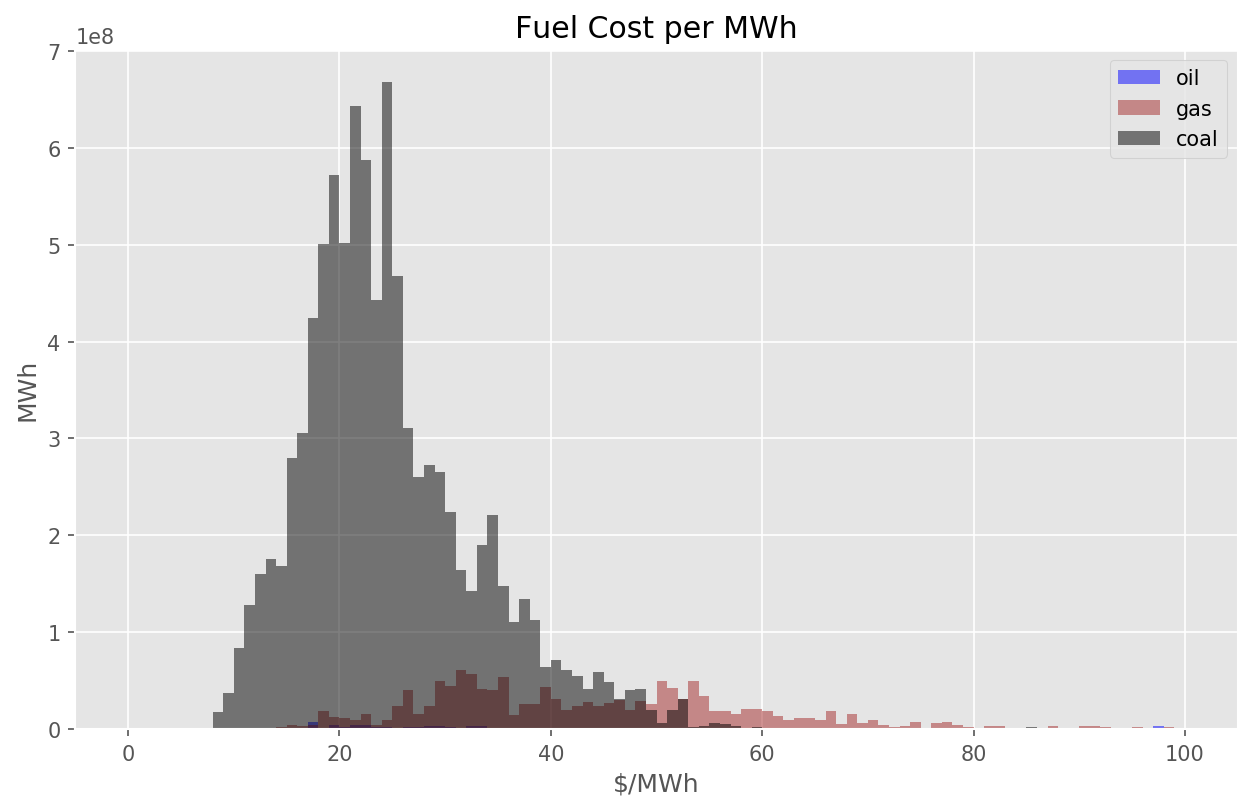

In [26]:
#plt.hist(mmbtu_one_fuel_bit.mmbtu_propotion_es, range=(.4,1), bins=100, alpha=0.5, color='green', label="BIT")
plt.hist(fuel_cost[fuel_cost['energy_source_cons'] == 'oil'].fuel_cost_per_mwh, bins=100,range=(0,100), alpha=0.5, color='blue', label="oil",weights=fuel_cost[fuel_cost['energy_source_cons'] == 'oil'].net_generation_mwh)
plt.hist(fuel_cost[fuel_cost['energy_source_cons'] == 'gas'].fuel_cost_per_mwh, bins=100,range=(0,100), alpha=0.5, color='brown', label="gas", weights=fuel_cost[fuel_cost['energy_source_cons'] == 'gas'].net_generation_mwh)
plt.hist(fuel_cost[fuel_cost['energy_source_cons'] == 'coal'].fuel_cost_per_mwh, bins=100,range=(0,100), alpha=0.5, color='black', label="coal",weights=fuel_cost[fuel_cost['energy_source_cons'] == 'coal'].net_generation_mwh)
plt.xlabel("$/MWh")
plt.ylabel("MWh")
plt.title("Fuel Cost per MWh")
plt.legend();

In [27]:
fuel_cost_gas[fuel_cost_gas.fuel_cost.isnull()]

,plant_id_eia,report_year,generator_id,net_generation_mwh,energy_source,energy_source_cons,energy_source_count,mmbtu,fuel_cost,fuel_cost_per_mmbtu_average,heat_rate_mmbtu_mwh,fuel_cost_per_mwh
12,7,2015,1,146980.00,NG,gas,1.0,NaN,NaN,NaN,13.315296,NaN
13,7,2015,2,67675.00,NG,gas,1.0,NaN,NaN,NaN,14.101466,NaN
303,201,2014,2,1336.00,NG,gas,1.0,NaN,NaN,NaN,12.653323,NaN
304,201,2015,1,20802.00,NG,gas,1.0,NaN,NaN,NaN,31.717902,NaN
305,201,2015,2,55617.00,NG,gas,1.0,NaN,NaN,NaN,11.863204,NaN
306,201,2016,1,55394.00,NG,gas,1.0,NaN,NaN,NaN,40.984122,NaN
307,201,2016,2,200508.00,NG,gas,1.0,NaN,NaN,NaN,11.322613,NaN
312,202,2013,1,11996.00,NG,gas,1.0,NaN,NaN,NaN,12.532896,NaN
313,202,2014,1,3132.00,NG,gas,1.0,NaN,NaN,NaN,13.705830,NaN
314,202,2015,1,32020.00,NG,gas,1.0,NaN,NaN,NaN,12.900772,NaN


### Exploration of missing fuel costs.

In [28]:
# The frc9 pull is being done in a formula now from outputs and is thus not needed for calculating heat rate
# But it's useful for checking missing fuel costs from the original frc table
frc9 = analysis.simple_select_with_pudl_plant_id('fuel_receipts_costs_eia923', pudl_engine)
frc9['fuel_cost'] = (frc9['fuel_quantity'] * frc9['average_heat_content'] * frc9['fuel_cost_per_mmbtu'])
frc9['mmbtu'] =  (frc9['fuel_quantity'] * frc9['average_heat_content'])

frc9['energy_source_cons'] = frc9.energy_source.copy()

for energy_source_cons in constants.energy_source_map.keys():
    for energy_source in constants.energy_source_map[energy_source_cons]:
        frc9.loc[frc9.energy_source==energy_source, 'energy_source_cons'] = energy_source_cons 

In [29]:
# Are we missing data from frc, or is there not cost info?
missing_in_frc = fuel_cost_one_fuel[fuel_cost_one_fuel.fuel_cost.isnull()]
missing_in_frc = missing_in_frc[['plant_id_eia','report_year']].drop_duplicates()
frc9['report_year'] = pd.to_datetime(frc9.report_date).dt.year
missing = missing_in_frc.merge(frc9,left_on=['plant_id_eia','report_year'],right_on=['plant_id_eia','report_year'])
missing[~missing.fuel_cost_per_mmbtu.isnull()]
# It apears that there are no missing frc records that actually have a fuel cost record. 

,plant_id_eia,report_year,fuel_receipt_id,report_date,contract_type,contract_expiration_date,energy_source,fuel_group,coalmine_id,supplier,fuel_quantity,average_heat_content,average_sulfur_content,average_ash_content,average_mercury_content,fuel_cost_per_mmbtu,primary_transportation_mode,secondary_transportation_mode,natural_gas_transport,plant_id_pudl,fuel_cost,mmbtu,energy_source_cons


### Exploration into portion of naturual gas for startup fuel from coal plants

In [30]:
frc9_summed = frc9_summed.rename(columns={'energy_source':'energy_source_fuel'})
one_fuel_plants = one_fuel_plants.rename(columns={'energy_source':'energy_source_plant'})

frc9_summed = frc9_summed.rename(columns={'energy_source_cons':'energy_source_cons_fuel'})
one_fuel_plants = one_fuel_plants.rename(columns={'energy_source_cons':'energy_source_cons_plant'})

In [31]:
mmbtu_one_fuel_es = frc9_summed.merge(one_fuel_plants.drop_duplicates(subset=['plant_id_eia','energy_source_plant','report_year']),
                                    how='left',
                                    on=['plant_id_eia',
                                        'report_year'])
# we'll merge with a total plant mmbtu, so we need to rename the per energy_source mmtbu
# we also need to drop all the NaN columns bc they are the multi fuel plants
# we also only need a few columns
mmbtu_one_fuel_es = mmbtu_one_fuel_es.rename(columns={'mmbtu': 'mmbtu_es'})\
                                     .dropna()\
                                     .drop(['fuel_cost',
                                            'fuel_cost_per_mmbtu_average',
                                            'generator_id',
                                            'energy_source_count'],axis=1)

In [32]:
mmbtu_one_fuel_plant = frc9_summed_plant.merge(one_fuel_plants.drop_duplicates(subset=['plant_id_eia','energy_source_plant','report_year']),
                                    how='left',
                                    on=['plant_id_eia',
                                        'report_year'])
mmbtu_one_fuel_plant = mmbtu_one_fuel_plant.rename(columns={'mmbtu': 'mmbtu_plant'})\
                                           .dropna()\
                                           .drop(['fuel_cost',
                                                  'fuel_cost_per_mmbtu_average',
                                                  'generator_id',
                                                  'energy_source_count'],axis=1)

In [33]:
mmbtu_one_fuel = mmbtu_one_fuel_es.merge(mmbtu_one_fuel_plant,how='left',on=['plant_id_eia','report_year','energy_source_plant','energy_source_cons_plant'])


In [34]:
mmbtu_one_fuel['mmbtu_propotion_es'] = mmbtu_one_fuel['mmbtu_es']/mmbtu_one_fuel['mmbtu_plant']

In [35]:
mmbtu_one_fuel[mmbtu_one_fuel['energy_source_cons_fuel'] == 'coal'].count()

plant_id_eia                1392
report_year                 1392
energy_source_cons_fuel     1392
mmbtu_es                    1392
energy_source_plant         1392
energy_source_cons_plant    1392
mmbtu_plant                 1392
mmbtu_propotion_es          1392
dtype: int64

In [36]:
mmbtu_one_fuel_coal = mmbtu_one_fuel[(mmbtu_one_fuel['energy_source_cons_plant'] == 'coal') & 
                                    (mmbtu_one_fuel['energy_source_cons_fuel'] == 'coal')]

In [37]:
mmbtu_one_fuel_coal[mmbtu_one_fuel_coal['mmbtu_propotion_es'] < .8].drop_duplicates(subset=['plant_id_eia'])

,plant_id_eia,report_year,energy_source_cons_fuel,mmbtu_es,energy_source_plant,energy_source_cons_plant,mmbtu_plant,mmbtu_propotion_es
4,7,2011,coal,1.018168e+06,BIT,coal,1.508074e+06,0.675144
616,728,2013,coal,3.514502e+06,BIT,coal,4.891185e+06,0.718538
789,1073,2009,coal,2.967973e+06,SUB,coal,5.392212e+06,0.550418
1512,2008,2010,coal,3.168273e+05,BIT,coal,4.200083e+05,0.754336
2094,3287,2015,coal,8.456256e+05,BIT,coal,7.323760e+06,0.115463
2506,3992,2009,coal,1.199654e+05,BIT,coal,2.095420e+05,0.572513
2526,4054,2009,coal,9.391873e+06,SUB,coal,1.181299e+07,0.795046
3401,6639,2009,coal,2.531388e+07,BIT,coal,3.406345e+07,0.743139
3485,6823,2009,coal,1.441046e+07,BIT,coal,3.445774e+07,0.418207
5433,56786,2016,coal,3.917563e+06,LIG,coal,5.671025e+06,0.690803


In [38]:
mmbtu_one_fuel_coal.describe()

,plant_id_eia,report_year,mmbtu_es,mmbtu_plant,mmbtu_propotion_es
count,1386.000000,1386.000000,1.386000e+03,1.386000e+03,1386.000000
mean,5482.108225,2012.280664,5.012591e+07,5.038575e+07,0.986687
std,9865.448476,2.250362,4.577747e+07,4.580064e+07,0.060401
min,7.000000,2009.000000,2.931229e+04,3.249133e+04,0.115463
25%,1378.000000,2010.000000,1.453028e+07,1.465307e+07,0.995358
50%,3397.500000,2012.000000,3.472854e+07,3.540164e+07,0.997762
75%,6177.000000,2014.000000,7.459045e+07,7.471380e+07,0.998858
max,56808.000000,2016.000000,2.320918e+08,2.323386e+08,1.000000


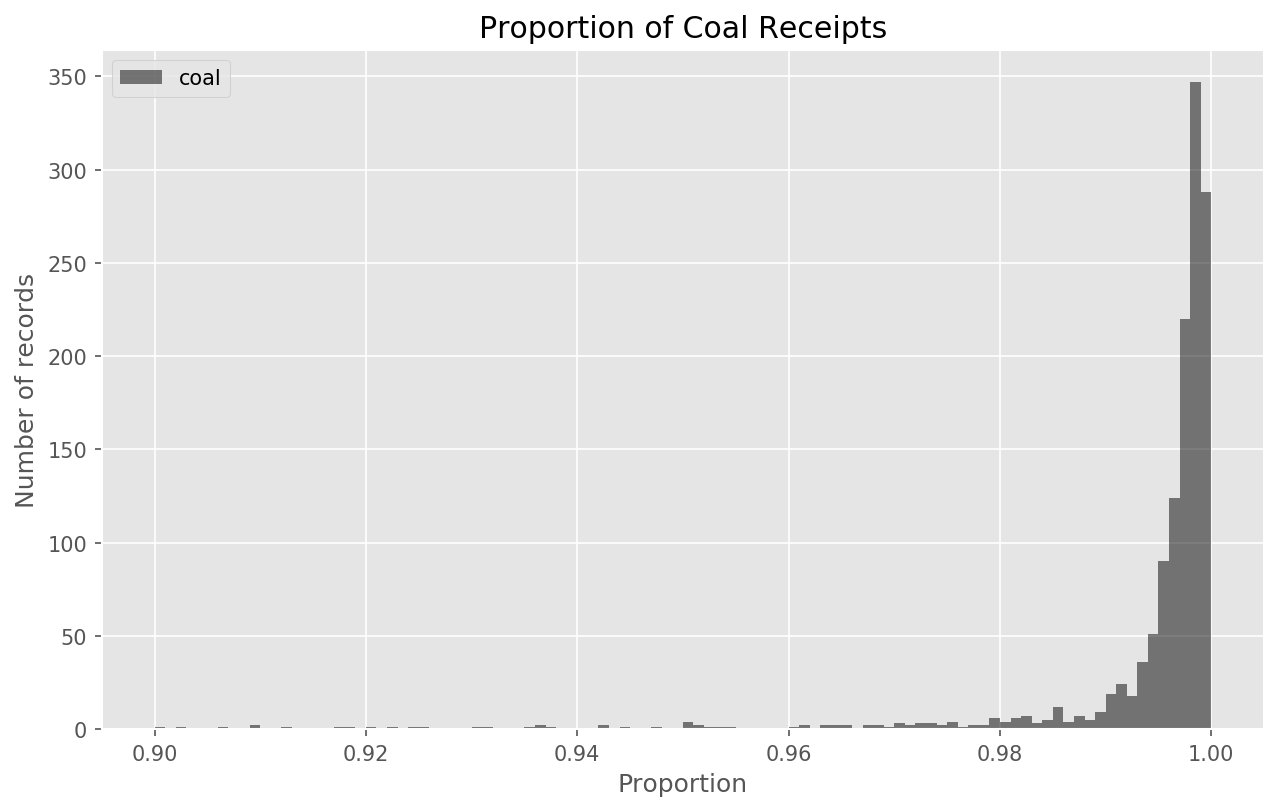

In [39]:
plt.hist(mmbtu_one_fuel_coal.mmbtu_propotion_es, range=(.9,1), bins=100, alpha=0.5, color='black', label="coal")
plt.xlabel("Proportion")
plt.ylabel("Number of records")
plt.title("Proportion of Coal Receipts")
plt.legend();

Additional problem exploration...

In [41]:
# There are some generators out of 27,000 that don't have records in the generators table
# A chunk of these appear to be plants that are retired mid-way through a year
# this will be fixed when we pull in the retired tab into the generators table.
# A chunk of these appear to be genertors added after 2016. This should be fiexed
# when we pull in 2016 data.
test = g9_summed.merge(net_gen_one_fuel.append(net_gen_multi_fuel),how='left')
test[test.energy_source.isnull()].count()

plant_id_eia           256
report_year            256
generator_id           256
net_generation_mwh     256
energy_source            0
energy_source_cons       0
energy_source_count      0
dtype: int64